In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:

df = pd.read_csv('in/zad3_xrd_5.txt', sep='\s+', decimal='.')
df

,t,u
0,20.000,0.0
1,20.010,0.0
2,20.020,0.0
3,20.030,0.0
4,20.040,0.0
...,...,...
6983,89.956,0.0
6984,89.966,0.0
6985,89.976,0.0
6986,89.986,0.0


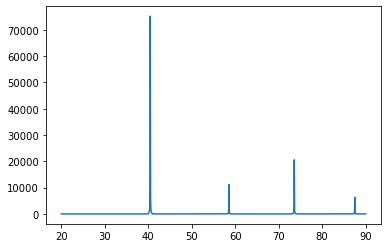

In [5]:
plt.plot(df['t'], df['u'])


In [6]:

max1_u = df[1500:3000]['u'].max()
max1_t = df['t'].loc[df['u'] == max1_u]
print("x =", max1_t.min(), "y =", max1_u)

max2_u = df[3500:5000]['u'].max()
max2_t = df['t'].loc[df['u'] == max2_u]
print("x =", max2_t.min(), "y =", max2_u)

max3_u = df[5000:6000]['u'].max()
max3_t = df['t'].loc[df['u'] == max3_u]
print("x =", max3_t.min(), "y =", max3_u)

max4_u = df[6000:7000]['u'].max()
max4_t = df['t'].loc[df['u'] == max4_u]
print("x =", max4_t.min(), "y =", max4_u)

x = 40.457 y = 75180.242
x = 58.549 y = 11087.729
x = 73.576 y = 20561.938
x = 87.501 y = 6320.149


In [11]:
_lambda = 1.4767 #Angstrom
_d = 3.52 #Angstrom, stała sieciowa

In [20]:
#odległość międzypłaszczyznowa
def calculate_d_hkl(h,k,l)-> float:
    return _d/np.sqrt(h**2 + k**2 + l**2)

#2theta
def calculate_2_theta(h,k,l,n):
    return 2*np.arcsin((n/2)/calculate_d_hkl(h,k,l))

#F_hkl
def calculate_F_hkl(h,k,l):
    return 1 + (-1)**(h+k) + (-1)**(h+l) + (-1)**(k+l)

#sprawdz czy legitne
def calculate_check(h,k,l):
    cond_1 = (np.sin(np.radians(10))*2*_d/_lambda)**2 <= (h**2 + k**2 + l**2)
    cond_2 = (np.sin(np.radians(45))*2*_d/_lambda)**2 >= (h**2 + k**2 + l**2)
    return cond_1 & cond_2

print('min = ', (np.sin(np.radians(10))*2*_d/_lambda)**2)
print('max = ', (np.sin(np.radians(45))*2*_d/_lambda)**2)

min =  0.6853323438156173
max =  11.363988167727909


In [18]:
tab = []
for (h) in range(0, 10):
    for(k) in range(0, 10):
        for(l) in range(0, 10):
            if calculate_check(h,k,l)==True :
                tab.append([h,k,l,calculate_d_hkl(h,k,l),np.degrees(calculate_2_theta(h,k,l,1)), calculate_F_hkl(h,k,l)])



df = pd.DataFrame(tab, columns=['h','k','l','d', '2theta', 'F/phi'])
df

,h,k,l,d,2theta,F/phi
0,0,0,1,3.520000,16.332450,0
1,0,0,2,1.760000,33.009031,4
2,0,0,3,1.173333,50.445225,0
3,0,1,0,3.520000,16.332450,0
4,0,1,1,2.489016,23.177153,0
5,0,1,2,1.574192,37.038505,0
6,0,1,3,1.113122,53.383091,0
7,0,2,0,1.760000,33.009031,4
8,0,2,1,1.574192,37.038505,0
9,0,2,2,1.244508,47.377154,4


In [22]:
df = df.drop_duplicates(subset=['d', '2theta'], keep="first")

print("x =", max1_t.min(), "y =", max1_u)

print("x =", max2_t.min(), "y =", max2_u)

print("x =", max3_t.min(), "y =", max3_u)

print("x =", max4_t.min(), "y =", max4_u)
df

x = 40.457 y = 75180.242
x = 58.549 y = 11087.729
x = 73.576 y = 20561.938
x = 87.501 y = 6320.149


,h,k,l,d,2theta,F/phi
0,0,0,1,3.520000,16.332450,0
1,0,0,2,1.760000,33.009031,4
2,0,0,3,1.173333,50.445225,0
4,0,1,1,2.489016,23.177153,0
5,0,1,2,1.574192,37.038505,0
6,0,1,3,1.113122,53.383091,0
9,0,2,2,1.244508,47.377154,4
17,1,1,1,2.032273,28.485417,4
18,1,1,2,1.437034,40.722600,0
19,1,1,3,1.061320,56.212938,4
